# Une brève introduction à
<img src="matplotlib_logo.svg">
# et seaborn, en Jupyter notebook, en franglais

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
from matplotlib import cm
from matplotlib.patches import Ellipse

## Line plots

Notes: show some interactivity, mainly get on to figure, legend, subplot, interactive vs inline, some standard color stuff

First we create some data:

In [2]:
np.random.seed(2)

coeffs = np.random.random(5)
print('coeffs:', coeffs)

x1 = np.linspace(0, 1, 100)
y1 = np.zeros(x1.shape)
for i, c in enumerate(coeffs):
    y1 += c * np.sin(np.pi * x1 * (i+1))

x2 = [0, 0.2, 0.3, 0.6, 0.95]
y2 = [1, 0, 0.4, 1.2, 0.7]

x3 = np.arange(0,1.0, 0.2)
y3 = np.random.random(len(x3))

coeffs: [0.4359949  0.02592623 0.54966248 0.43532239 0.4203678 ]


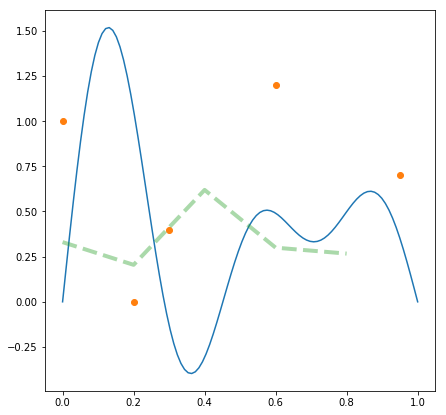

In [3]:
plt.figure(figsize=(7,7))
plt.plot(x1,y1)  
plt.plot(x2,y2,'o')
plt.plot(x3,y3,'--', lw=4, alpha=0.4)
#,ls=':',marker='o',markevery=4,markersize=12,label=r'$f(x)$')
#plt.plot(x3,y3) #,ls='--', alpha=0.4,lw=4,label='some data')
plt.savefig('figure_1.1.eps')
plt.show()

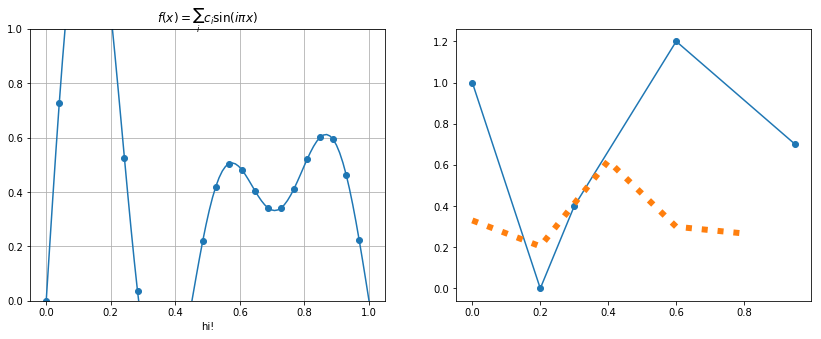

x2 is type <class 'list'>, x3 is type <class 'numpy.ndarray'>


In [4]:

fig = plt.figure(figsize=(14,5))

ax = fig.add_subplot(1,2,1)
ax.plot(x1,y1, marker='o', markevery=4)                     #, marker='o', #smarker='^', markevery=4, markerfacecolor='none'
ax.set(ylim=[0,1])
ax.grid()                          #, color='r', linestyle='--', linewidth=2)
ax.set_xlabel('hi!')
ax.set_title(r'$f(x) = \sum_i c_i \sin(i \pi x)$')

ax = fig.add_subplot(1,2,2)
plt.plot(x2,y2,marker='o')
plt.plot(x3,y3,':', lw=6)
plt.show()

print('x2 is type ' + str(type(x2)) + ', x3 is type ' + str(type(x3)))

## Now let's generate a surface to plot

In [5]:
def make_some_data(grid_size=100):
    n = 10 # number of cos / sin freqs to go to
    end = 0.0
    np.random.seed(0)

    coeff_s = np.zeros((n,n))
    coeff_c = np.zeros((n,n))

    # Hand-made nice lookin z to gradient descend
    coeff_c[1,0] = 0.15
    coeff_c[0,1] = 0.2
    coeff_s[0,1] = 0.3
    coeff_s[1,0] = 0.2
    coeff_c[2,1] = 0.05
    coeff_c[1,2] = 0.05
    coeff_c[2,2] = 0.1
    coeff_s[2,1] = 0.02
    coeff_s[1,2] = 0.04
    coeff_s[2,2] = 0.03

    # Bit of random noise for vibes
    ns = 4
    coeff_s[ns:,ns:] = 0.025 * np.random.random((n-ns, n-ns)) * np.outer(np.arange(1.0, end, -(1.0-end) / (n-ns)), np.arange(1.0, end, -(1.0-end) / (n-ns)))
    coeff_c[ns:,ns:] = 0.025 * np.random.random((n-ns, n-ns)) * np.outer(np.arange(1.0, end, -(1.0-end) / (n-ns)), np.arange(1.0, end, -(1.0-end) / (n-ns)))

    xs,ys = np.meshgrid(np.linspace(0,1.,grid_size+1), np.linspace(0,1.,grid_size+1))

    z = np.zeros(xs.shape)
    for i in range(n):
        for j in range(n):
            z += coeff_s[i,j] * np.sin(2 * np.pi * (i*xs + j*ys)) + coeff_c[i,j] * np.cos(2 * np.pi * (i*xs + j*ys))
    z =  (z - z.min()) / (z.max() - z.min()) 

    return xs, ys, z

In [6]:
grid_size = 100
x, y, z = make_some_data(grid_size)

# let us also calculate the gradient...
xg = -(z[1:-1,2:] - z[1:-1,:-2]) * grid_size
yg = -(z[2:,1:-1] - z[:-2,1:-1]) * grid_size
zg = -np.sqrt(xg*xg + yg*yg)

### Psuedocolor plot
```plt.pcolor(x,y,z)```

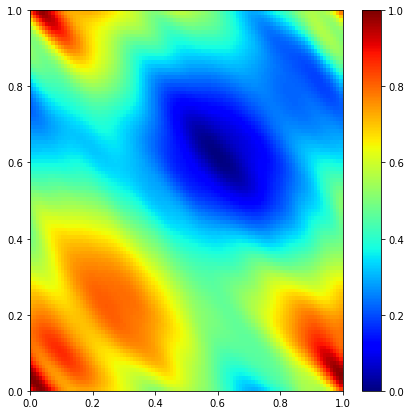

In [7]:
plt.figure(figsize=(7,7))

plt.pcolor(x,y,z, cmap=cm.jet)
plt.colorbar()
plt.show()

### Contour plot
```plt.contour(x, y, z)```

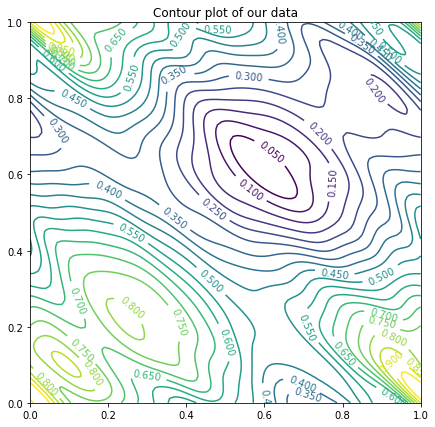

In [8]:
plt.figure(figsize=(7,7))

CS = plt.contour(x, y, z, 20)
plt.clabel(CS, inline=1, fontsize=10)

plt.title('Contour plot of our data')

#plt.colorbar()

plt.show()

### Quiver plot
```plt.quiver(x, y, x_dir, y_dir)```

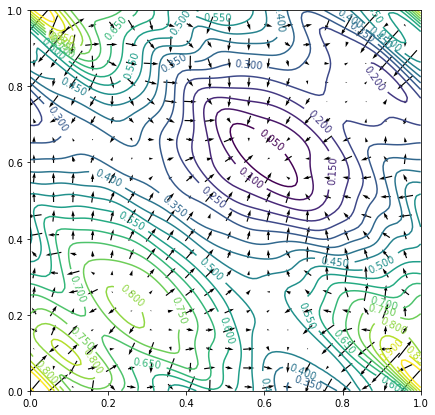

In [9]:
plt.figure(figsize=(7,7))


skip = 5
plt.quiver(x[1:-1:skip,1:-1:skip], y[1:-1:skip,1:-1:skip], xg[::skip,::skip], yg[::skip,::skip], pivot='middle')

#strm = plt.streamplot(x[1:-1,1:-1], y[1:-1,1:-1], yg, xg, color=zg, linewidth=2, cmap=plt.cm.gnuplot)
CS = plt.contour(x, y, z, 20, cmap=cm.viridis)
plt.clabel(CS, inline=1, fontsize=10)

plt.show()

### Even better - streamplot
```plt.streamplot(x, y, x_dir, y_dir)```

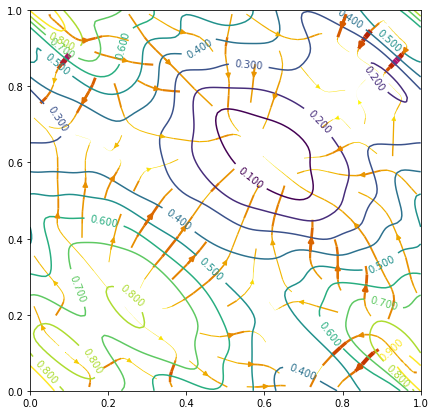

In [10]:
fig = plt.figure(figsize=(7,7))

strm = plt.streamplot(x[1:-1,1:-1], y[1:-1,1:-1], xg, yg, density=0.5, 
                      color=zg, cmap=cm.gnuplot, linewidth=zg*0.5)
#fig.colorbar(strm.lines)
CS = plt.contour(x, y, z, 10, cmap=cm.viridis)
plt.clabel(CS, inline=1, fontsize=10)
#density=[0.5, 1])
#density=0.6, color='k', linewidth=zg*0.5)

plt.show()

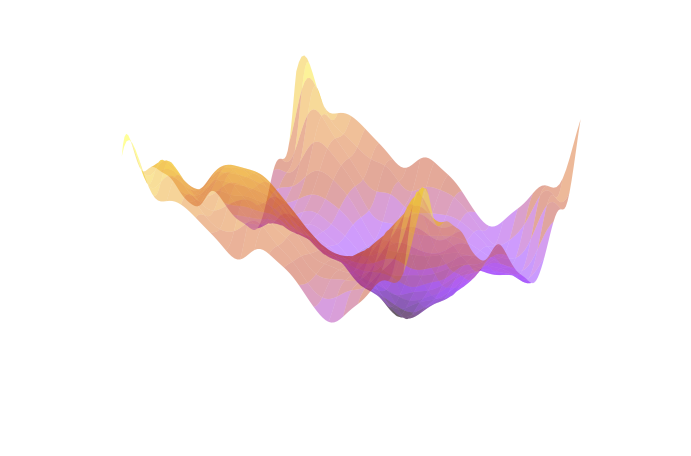

In [11]:
%matplotlib inline

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(1,1,1,projection='3d')

rcount, ccount = z.shape

surf = ax.plot_surface(x, y, z, cmap=cm.gnuplot, shade=False, ccount=ccount/5, rcount=rcount/5, alpha = 0.4)
surf.set_facecolor((0,0,0,0))
ax.axis('off')
plt.show()

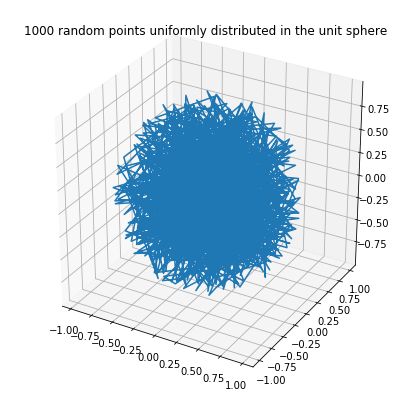

In [12]:
def bounded_uniform_random_points(d, N, sigma):
    # Generate N d-dimensional uniform random points within the sigma-ball. Uses normal distribution
        
    rs = sigma * np.random.random(N)**(1.0/3.0) # Cube root so we get uniform spatial amounts 
    
    coords = np.random.standard_normal((d,N))
    xs = coords / np.sqrt((coords*coords).sum(axis=0)) # normalise to sit on unit sphere
        
    return xs * rs

xs = bounded_uniform_random_points(3, 1000, 1.0)

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(1, 1, 1, projection='3d', title='1000 random points uniformly distributed in the unit sphere')

ax.plot(xs[0,:], xs[1,:], xs[2,:])
plt.show()

# Animation

Lets animate the solution to a reaction-diffusion equation
### $$
\begin{aligned}
\frac{\partial u}{\partial t} &= \sigma_u \nabla u - u v^2 + \gamma (1 - u) \\
\frac{\partial v}{\partial t} &= \sigma_v \nabla v + u v^2 + (\gamma + k) v
\end{aligned}
$$
where $\sigma_u, \sigma_v, k, \gamma$ are some parameters

In [13]:
def laplacian(f):
    # result is u_xx + u_yy
    # Assume u is an np.ndarray
    f_pad = np.pad(f, ((1,1),(1,1)), 'edge')
    return f_pad[0:-2,1:-1] + f_pad[1:-1,0:-2] - 4*f_pad[1:-1,1:-1] + f_pad[1:-1,2:] + f_pad[2: ,1:-1]

Du = 0.08
Dv = 0.04
gamma = 0.06
k = 0.062

def reaction_diffusion_step(u, v):
    
    u += Du * laplacian(u) - u*u*v + gamma * (1.0 - u)
    v += Dv * laplacian(v) + u*u*v + (gamma + k) * v
    
    return u, v

n = 100 # The grid size
u = np.random.random((n,n))
v = np.random.random((n,n))

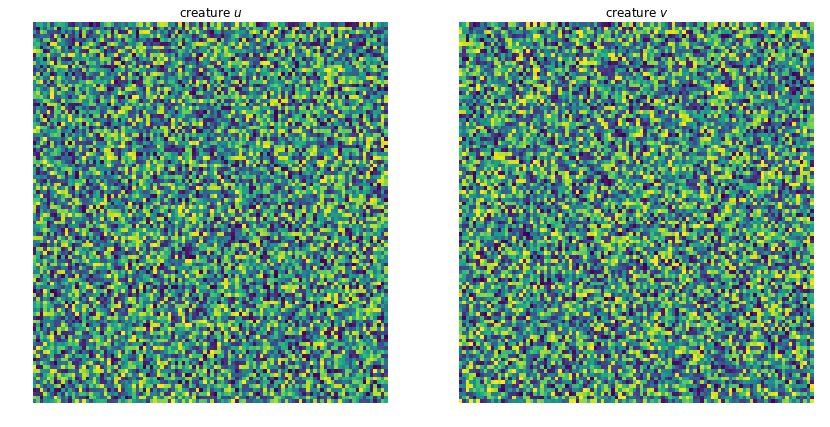

In [14]:

plt.figure(figsize=(14,7))
ax = plt.subplot(1,2,1)
plot_u = ax.pcolor(u)
ax.axis('off')
ax.set_title(r'creature $u$')
ax = plt.subplot(1,2,2)
plot_v = ax.pcolor(v)
ax.axis('off')
ax.set_title(r'creature $v$')
plt.show()

u_last = u
v_last = v

u,v = reaction_diffusion_step(u_last,v_last)


### We require an "animate" function to do animations...

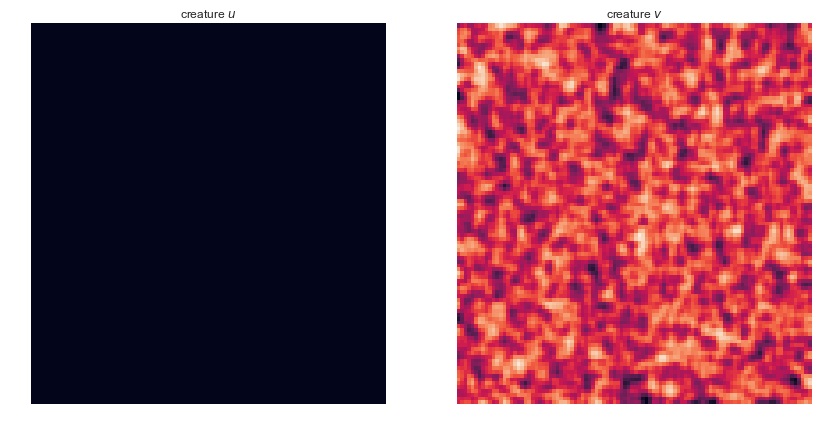

In [33]:
%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML

T = 20
ut = np.zeros((n,n,T))
vt = np.zeros((n,n,T))
ut[:,:,0] = np.random.random((n,n))
vt[:,:,0] = np.random.random((n,n))

fig = plt.figure(figsize=(14,7))
ax = plt.subplot(1,2,1)
plot_u = ax.pcolor(np.zeros((n,n)))

ax.axis('off')
ax.set_title(r'creature $u$')
ax = plt.subplot(1,2,2)

plot_v = ax.pcolor(np.zeros((n,n)))

ax.axis('off')
ax.set_title(r'creature $v$')

for t in range(1,T):
    ut[:,:,t], vt[:,:,t] = reaction_diffusion_step(ut[:,:,t-1], vt[:,:,t-1])

def init():
    plot_u = ax.pcolor(ut[:,:,0])
    plot_v = ax.pcolor(vt[:,:,0])
    return (plot_u, plot_v,)

def animate(i):
    plot_u = ax.pcolor(ut[:,:,i])
    plot_v = ax.pcolor(vt[:,:,i])
    
    return (plot_u, plot_v,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=T, interval=20, blit=True)

#anim.save('reaction_diffusion.mp4', fps=24)
HTML(anim.to_html5_video())
#HTML(anim.to_jshtml())

In [ ]:
def init():
    plot_u = ax.pcolor(ut[:,:,0])
    plot_v = ax.pcolor(vt[:,:,0])
    return (plot_u, plot_v,)

def animate(i):
    plot_u = ax.pcolor(ut[:,:,i])
    plot_v = ax.pcolor(vt[:,:,i])
    
    return (plot_u, plot_v,)

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=T, interval=1, blit=True)
#anim.save('reaction_diffusion.mp4', fps=24)
HTML(anim.to_html5_video())
#HTML(anim.to_jshtml())

# And now some other stuff

In [ ]:
delta = 45.0  # degrees

angles = np.arange(0, 360 + delta, delta)
ells = [Ellipse((1, 1), 4, 2, a) for a in angles]

a = plt.subplot(111, aspect='equal')

for e in ells:
    e.set_clip_box(a.bbox)
    e.set_alpha(0.1)
    a.add_artist(e)

plt.xlim(-2, 4)
plt.ylim(-1, 3)

plt.show()

<IPython.core.display.Javascript object>


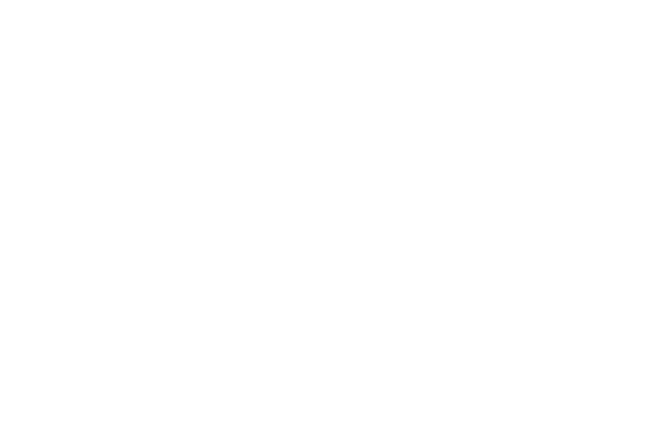

<IPython.core.display.Javascript object>


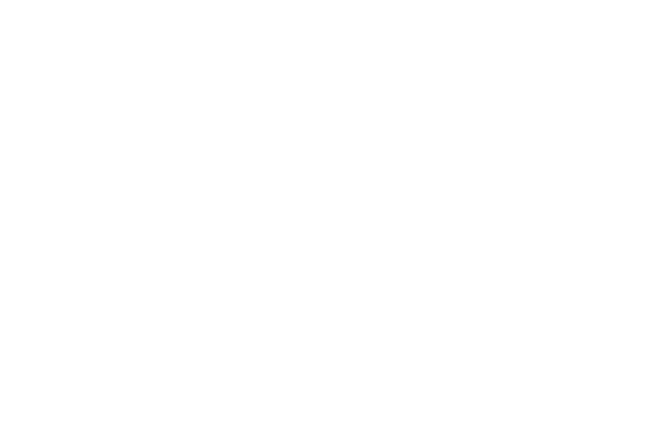

In [17]:
import seaborn as sns
%matplotlib notebook
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()

plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t, s, lw=2, color='red')
plt.axis([0, 1, -10, 10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()
sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

# A few brief words about seaborn

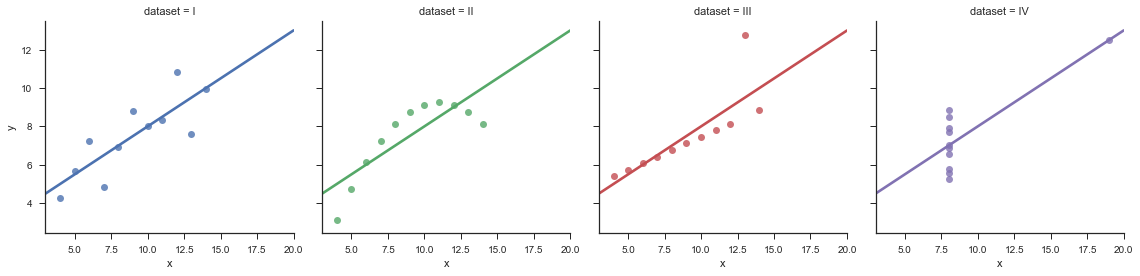

In [26]:
%matplotlib inline
import seaborn as sns
sns.set(style="ticks")

# Load the example dataset for Anscombe's quartet
df = sns.load_dataset("anscombe")

plt.figure(figsize=(15,7))

# Show the results of a linear regression within each dataset
sns.lmplot(x="x", y="y", col="dataset", data=df, ci=None, hue='dataset', size=4)


plt.show()

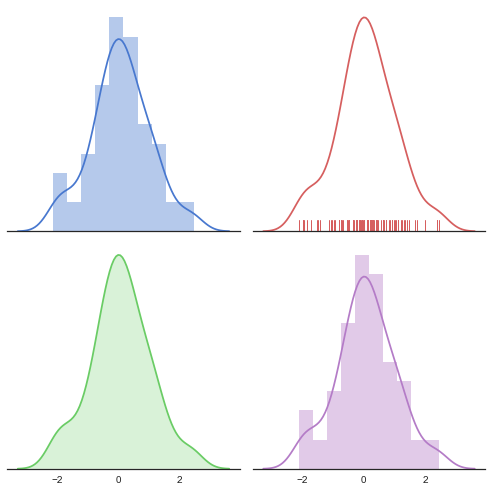

In [32]:
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(2, 2, figsize=(7, 7), sharex=True)
sns.despine(left=True)

# Generate a random univariate dataset
d = rs.normal(size=100)

# Plot a simple histogram with binsize determined automatically
sns.distplot(d, ax=axes[0,0])#, , color="b", ax=axes[0, 0])

# Plot a kernel density estimate and rug plot
sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])

# Plot a filled kernel density estimate
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])

# Plot a historgram and kernel density estimate
sns.distplot(d, color="m", ax=axes[1, 1])

plt.setp(axes, yticks=[])
plt.tight_layout()